<a href="https://colab.research.google.com/github/Kjosevski18/Data-Science-projects/blob/main/Smoking_health_Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import copy
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

#Let's find out who's a smoker and who's not

In [108]:
df = pd.read_csv('smoking_health.csv')
df.head()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0


In [109]:
df['current_smoker'] = (df['current_smoker'] == 'yes').astype(int)

In [110]:
print(df['current_smoker'].unique())

[1 0]


In [111]:
df['sex'] = (df['sex'] == 'male').astype(int)
print(df['sex'].unique())

[1 0]


In [112]:
df['cigs_per_day'] = (df['cigs_per_day'].replace('NaN', np.nan).fillna(0)).astype(int)
df

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,1,1,95,110/72,0,219.0
1,45,1,1,64,121/72,0,248.0
2,58,1,1,81,127.5/76,0,235.0
3,42,1,1,90,122.5/80,0,225.0
4,42,1,1,62,119/80,0,226.0
...,...,...,...,...,...,...,...
3895,37,1,1,88,122.5/82.5,60,254.0
3896,49,1,1,70,123/75,60,213.0
3897,56,1,1,70,125/79,60,246.0
3898,50,1,1,85,134/95,60,340.0


In [113]:
df[['bp_h', 'bp_l']] = df['blood_pressure'].str.split('/', expand=True)
df.drop(columns=['blood_pressure'], inplace=True)
df

,age,sex,current_smoker,heart_rate,cigs_per_day,chol,bp_h,bp_l
0,54,1,1,95,0,219.0,110,72
1,45,1,1,64,0,248.0,121,72
2,58,1,1,81,0,235.0,127.5,76
3,42,1,1,90,0,225.0,122.5,80
4,42,1,1,62,0,226.0,119,80
...,...,...,...,...,...,...,...,...
3895,37,1,1,88,60,254.0,122.5,82.5
3896,49,1,1,70,60,213.0,123,75
3897,56,1,1,70,60,246.0,125,79
3898,50,1,1,85,60,340.0,134,95


In [114]:
# Get the current order of columns
columns = list(df.columns)

# Remove 'current_smoker' from the list of columns
columns.remove('current_smoker')

# Append 'current_smoker' at the end of the list
columns.append('current_smoker')

# Reorder the DataFrame columns
df = df[columns]
df

,age,sex,heart_rate,cigs_per_day,chol,bp_h,bp_l,current_smoker
0,54,1,95,0,219.0,110,72,1
1,45,1,64,0,248.0,121,72,1
2,58,1,81,0,235.0,127.5,76,1
3,42,1,90,0,225.0,122.5,80,1
4,42,1,62,0,226.0,119,80,1
...,...,...,...,...,...,...,...,...
3895,37,1,88,60,254.0,122.5,82.5,1
3896,49,1,70,60,213.0,123,75,1
3897,56,1,70,60,246.0,125,79,1
3898,50,1,85,60,340.0,134,95,1


In [115]:
print(df['bp_h'].dtype)
print(df['bp_l'].dtype)
df['bp_h'] = df['bp_h'].astype(float)
df['bp_l'] = df['bp_l'].astype(float)

object
object


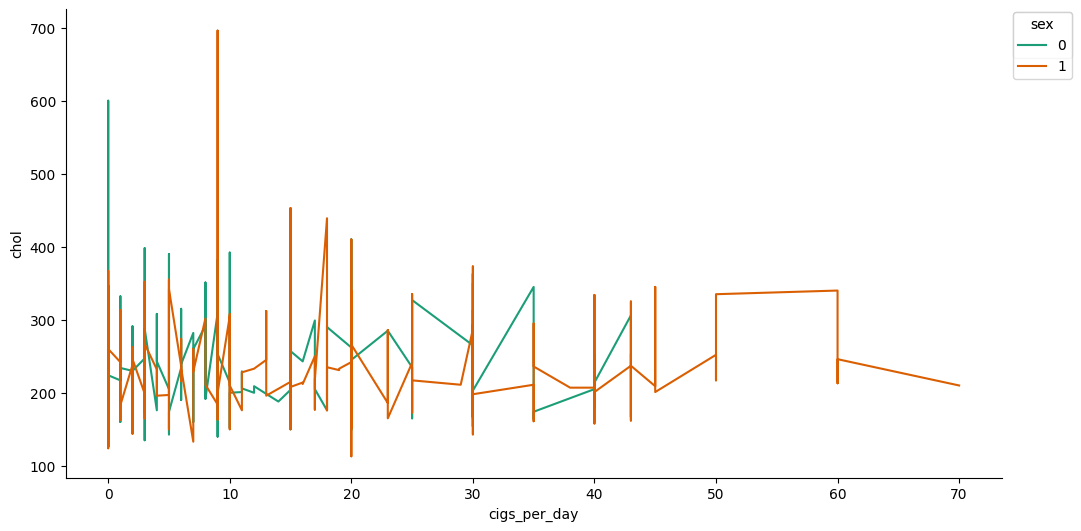

In [116]:
# @title cigs_per_day vs chol

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cigs_per_day']
  ys = series['chol']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('cigs_per_day', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cigs_per_day')
_ = plt.ylabel('chol')

<ipython-input-117-481292236e88>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='cigs_per_day', y='sex', inner='box', palette='Dark2')


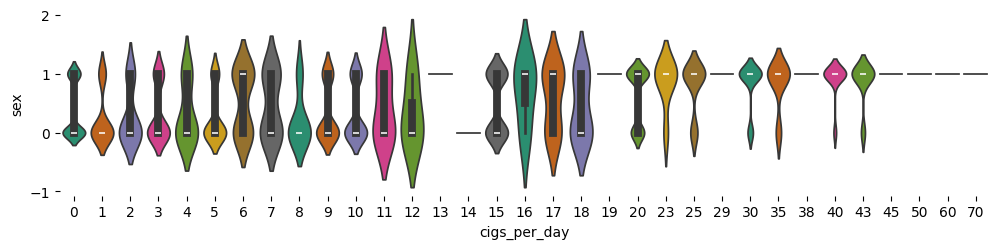

In [117]:
# @title sex vs cigs_per_day

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='cigs_per_day', y='sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

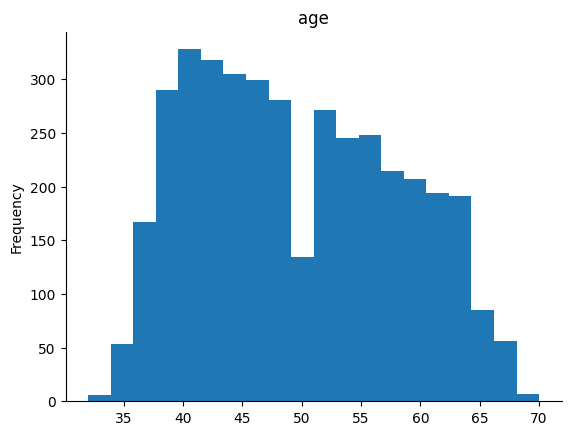

In [118]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

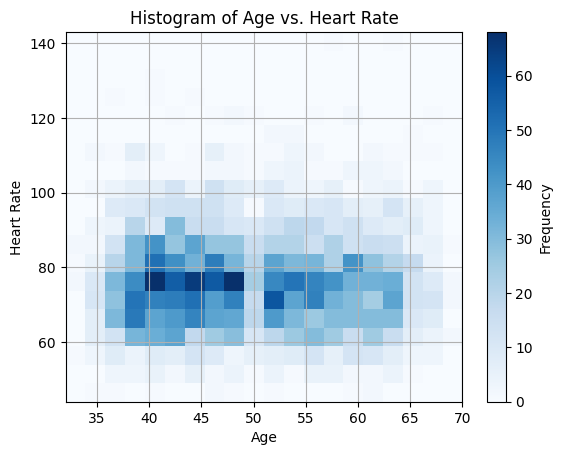

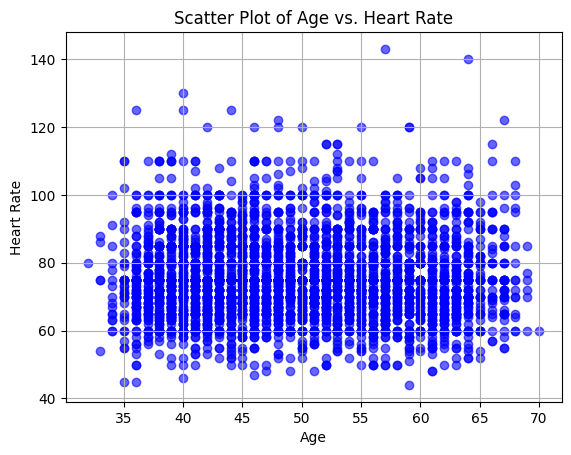

In [119]:
# heart rate vs age
plt.hist2d(df['age'], df['heart_rate'], bins=20, cmap='Blues')
plt.colorbar(label='Frequency')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.title('Histogram of Age vs. Heart Rate')
plt.grid(True)
plt.show()

# Scatter plot of heart_rate vs age
plt.scatter(df['age'], df['heart_rate'], alpha=0.6, color='blue')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.title('Scatter Plot of Age vs. Heart Rate')
plt.grid(True)
plt.show()

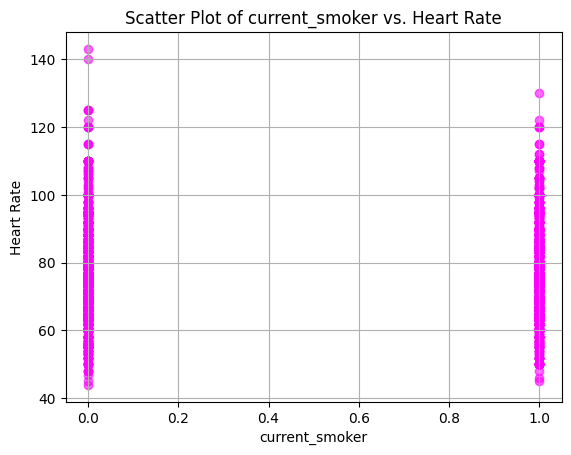

In [120]:
# Scatter plot of heart_rate vs current_smoker
plt.scatter(df['current_smoker'], df['heart_rate'], alpha=0.6, color='magenta')
plt.xlabel('current_smoker')
plt.ylabel('Heart Rate')
plt.title('Scatter Plot of current_smoker vs. Heart Rate')
plt.grid(True)
plt.show()

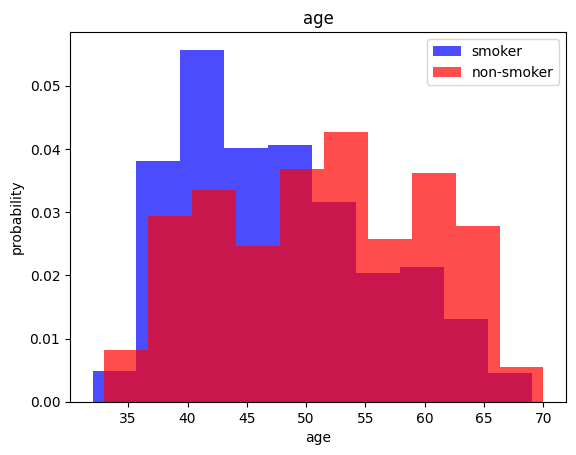

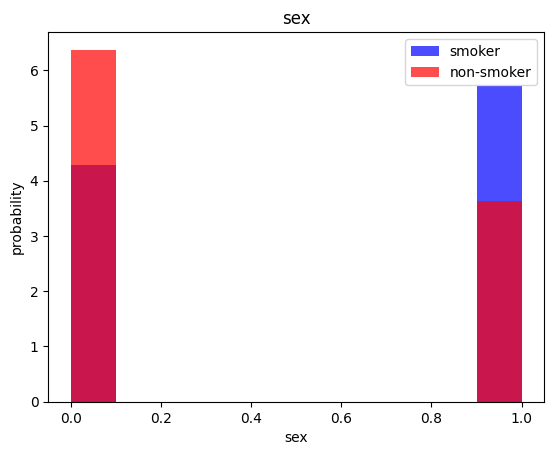

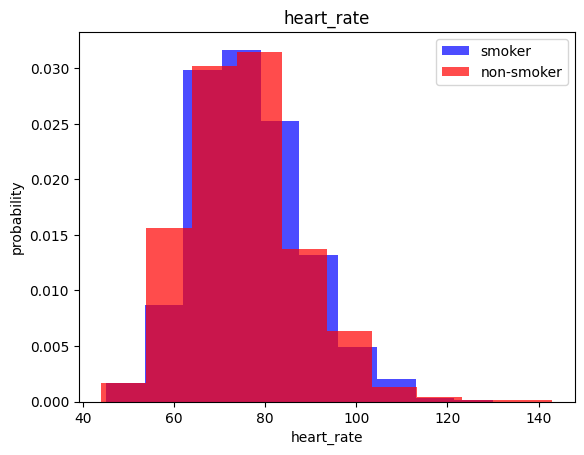

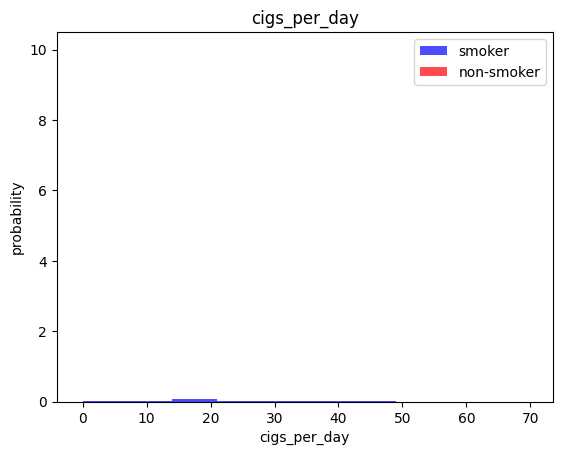

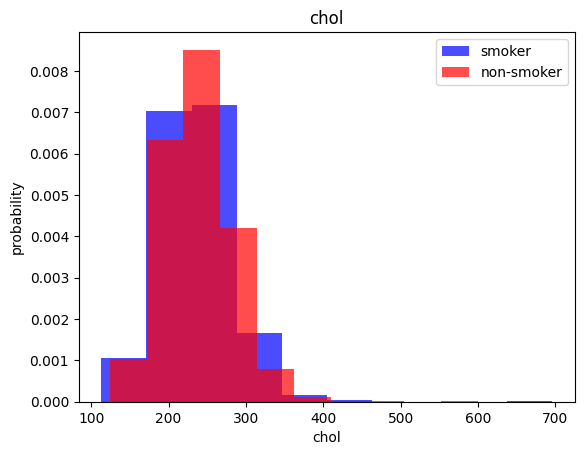

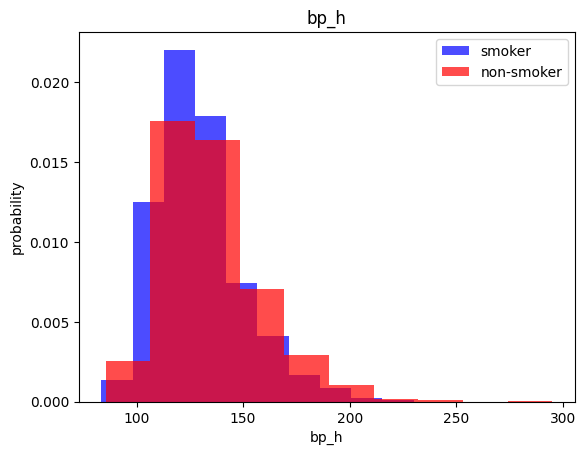

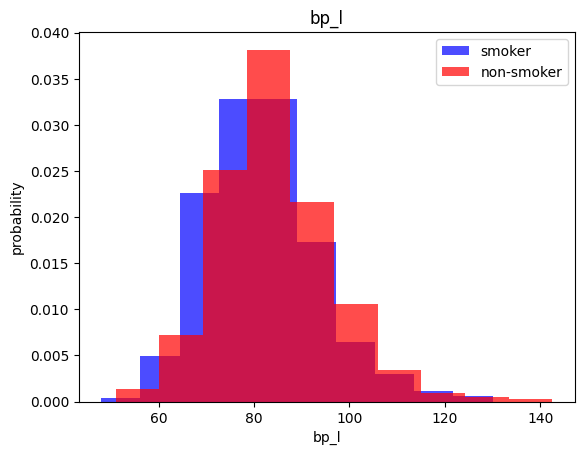

In [121]:
#Current_smoker vs everything

for label in df.columns[:-1]:
  plt.hist(df[df["current_smoker"] == 1][label], color= 'blue', label='smoker', alpha =0.7, density=True )
  plt.hist(df[df["current_smoker"] == 0][label], color= 'red', label='non-smoker', alpha =0.7, density=True )
  plt.title(label)
  plt.ylabel('probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Data preprocessing

# Check if there are some NaN values in the dataframe(df)

In [122]:
# Check for NaN values in df
nan_values = df.isna().any()

# Display columns with NaN values, if any
nan_columns = nan_values[nan_values].index.tolist()
if nan_columns:
    print("Columns with NaN values are:", nan_columns)
else:
    print("No columns with NaN values.")

Columns with NaN values are: ['chol']


Clear all NaN values found in df with the median values

In [123]:
# Calculate the median of the 'chol' column
median_value = df['chol'].median()

# Replace NaN values in the 'chol' column with the median
df.loc[df['chol'].isna(), 'chol'] = median_value

df

,age,sex,heart_rate,cigs_per_day,chol,bp_h,bp_l,current_smoker
0,54,1,95,0,219.0,110.0,72.0,1
1,45,1,64,0,248.0,121.0,72.0,1
2,58,1,81,0,235.0,127.5,76.0,1
3,42,1,90,0,225.0,122.5,80.0,1
4,42,1,62,0,226.0,119.0,80.0,1
...,...,...,...,...,...,...,...,...
3895,37,1,88,60,254.0,122.5,82.5,1
3896,49,1,70,60,213.0,123.0,75.0,1
3897,56,1,70,60,246.0,125.0,79.0,1
3898,50,1,85,60,340.0,134.0,95.0,1


In [124]:
print("Smokers are: ", sum(df["current_smoker"] == 1))
print("non-Smokers are: ", sum(df["current_smoker"] == 0)) #the two main categories are similar in size, so no oversampler is needed

Smokers are:  1932
non-Smokers are:  1968


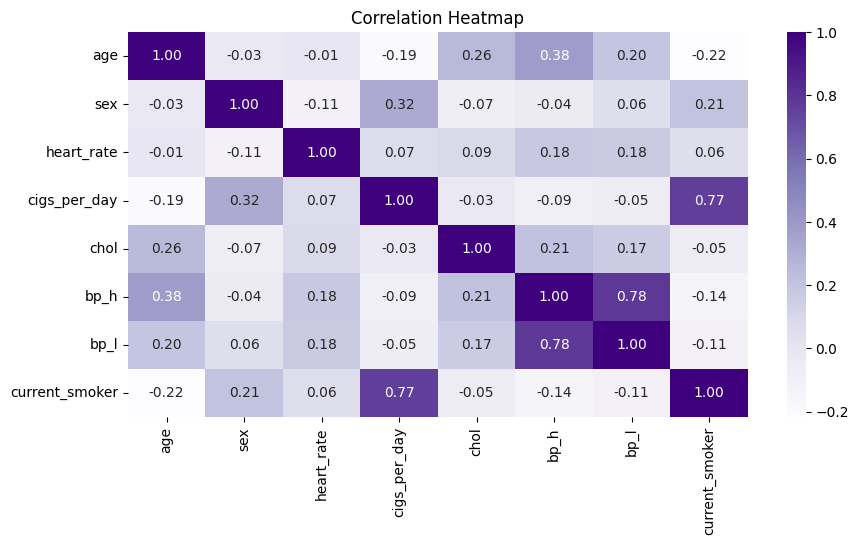

In [125]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Get_dataframe function for calling in model

In [126]:
train,valid,test = np.split(df.sample(frac=1), [int(len(df)*0.6), int(len(df)*0.8)])

In [127]:
def get_dataframe(dataframe):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  data = np.hstack((X,np.reshape(y,(len(y),1))))
  return data,X,y

In [128]:
train, X_train, y_train = (get_dataframe(train))
valid, X_valid, y_valid = get_dataframe(valid)
test, X_test, y_test = get_dataframe(test)

In [129]:
#train=train.astype(float)
#X_train=X_train.astype(float)
#y_train=y_train.astype(float)
#valid=valid.astype(float)
#X_valid=X_valid.astype(float)
#y_valid=y_valid.astype(float)
#test=test.astype(float)
#X_test=X_test.astype(float)
#y_test=y_test.astype(float)
print('not to show everything')

not to show everything


# Logistic Regression

In [130]:
lg_model = LogisticRegression(max_iter=1000)
lg_model.fit(X_train,y_train)
y_pred = lg_model.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy is: ", accuracy)
report = classification_report(y_pred, y_test)
print("Report : ", report)

Accuracy is:  0.9935897435897436
Report :                precision    recall  f1-score   support

           0       1.00      0.99      0.99       403
           1       0.99      1.00      0.99       377

    accuracy                           0.99       780
   macro avg       0.99      0.99      0.99       780
weighted avg       0.99      0.99      0.99       780



#Decision tree

In [131]:
from sklearn.tree import DecisionTreeClassifier

In [132]:
# Initalizing the decision tree clasifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Training the decision tree classifier
dt_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Generating the classification report
report = classification_report(y_test, y_pred)
print("Classification report: ", report)


Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99       398
           1       0.99      0.99      0.99       382

    accuracy                           0.99       780
   macro avg       0.99      0.99      0.99       780
weighted avg       0.99      0.99      0.99       780



#Support Vector Machine (SVM)

In [133]:
from sklearn.svm import SVC

In [134]:
# Initilaizing the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Training the SVM
svm_classifier.fit(X_train,y_train)

# Making predictions with the SVM
y_pred = svm_classifier.predict(X_test)

# Evaluating the model
report = classification_report(y_test,y_pred)
print("Classification report: ", report)

Classification report:                precision    recall  f1-score   support

           0       0.99      1.00      0.99       398
           1       1.00      0.99      0.99       382

    accuracy                           0.99       780
   macro avg       0.99      0.99      0.99       780
weighted avg       0.99      0.99      0.99       780



# K-Nearest Neighbors (KNN)

In [135]:
from sklearn.neighbors import KNeighborsClassifier

In [136]:
# Initalizing the KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Training the model
knn_classifier.fit(X_train,y_train)

# Making the predictions with the model
y_pred = knn_classifier.predict(X_test)

# Generating report
report = classification_report(y_test, y_pred)
print("Classification report: ")
print(report)

Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.93      0.88       398
           1       0.92      0.79      0.85       382

    accuracy                           0.86       780
   macro avg       0.87      0.86      0.86       780
weighted avg       0.87      0.86      0.86       780



# Naive Bayes

In [137]:
from sklearn.naive_bayes import GaussianNB

In [138]:
# Initializing the Naive Bayes classifier
nb_classifier = GaussianNB()

# Training of the model
nb_classifier.fit(X_train,y_train)

# Making the prediction on the test set
y_pred = nb_classifier.predict(X_test)

# Generating report
report = classification_report(y_test,y_pred)
print('Classification report: ')
print(report)

Classification report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       398
           1       1.00      0.99      0.99       382

    accuracy                           0.99       780
   macro avg       0.99      0.99      0.99       780
weighted avg       0.99      0.99      0.99       780



# Ridge regression
A regularized version of linear regression that adds a penalty term to the loss function to prevent overfitting.

In [139]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [140]:
# Initalizing the Rigde regression model
ridge_regression = Ridge(alpha=1.0)

# Training the Ridge model
ridge_regression.fit(X_train,y_train)

# Making predictions
y_pred = ridge_regression.predict(X_test)

# Generating report
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)


Mean squared error:  0.10313019474724024


# Linear Regressionw

In [141]:
from sklearn.linear_model import LinearRegression

In [142]:
# Initalizing the Linear Regression model
linear_regression = LinearRegression()

# Training the model
linear_regression.fit(X_train,y_train)

# Making prediction
y_pred = linear_regression.predict(X_test)

# Calculating the MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE is:", mse)

MSE is: 0.10313059203050967


# Random Forest

In [143]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Regression

In [144]:
# Initalizing the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state =42)

# Training the model
random_forest.fit(X_train,y_train)

# Making predictions
y_pred = random_forest.predict(X_test)

# MSE
mse = mean_squared_error(y_test,y_pred)
print("MSE: ", mse)

MSE:  0.0064893589743589735


# Classification

In [145]:
# Initializing the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
random_forest.fit(X_train, y_train)

# Making predictions on the test set
y_pred = random_forest.predict(X_test)

# Calculating accuracy to evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generating classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9935897435897436
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       398
           1       1.00      0.99      0.99       382

    accuracy                           0.99       780
   macro avg       0.99      0.99      0.99       780
weighted avg       0.99      0.99      0.99       780



# XGBoost

In [146]:
import xgboost as xgb

In [147]:
# Initializing the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Training the model
xgb_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Generating classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       398
           1       1.00      0.99      0.99       382

    accuracy                           0.99       780
   macro avg       0.99      0.99      0.99       780
weighted avg       0.99      0.99      0.99       780



# Neural Networks

In [148]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [149]:
print(X_train.dtype)
print(y_train.dtype)
print(X_train[0])
X_train.astype(int)

float64
int64
[ 49.   1.  95.  20. 273. 142. 108.]


array([[ 49,   1,  95, ..., 273, 142, 108],
       [ 62,   0,  85, ..., 233, 130,  87],
       [ 50,   0,  85, ..., 281, 107,  74],
       ...,
       [ 37,   1,  77, ..., 266, 110,  72],
       [ 61,   0,  85, ..., 272, 182, 121],
       [ 46,   1,  94, ..., 235, 150,  96]])

In [154]:
# Initializing the nerual network model
model = Sequential()
# Adding input layer and first hidden layer
model.add(Dense(units=128, activation = 'relu', input_shape=(X_train.shape[1],)))

# Adding second hidden layer
model.add(Dense(units=64, activation = 'relu'))

# Adding output layer
model.add(Dense(units=1, activation = 'sigmoid'))

# Compiling the model
model.compile(optimizer = 'Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_test,y_test))

# Making predictions on the test set
y_pred_proba = model.predict(X_test)
y_pred= (y_pred_proba > 0.5).astype(int)

# Calculating accuracy to evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ", accuracy)

# Generating classification report
report = classification_report(y_test,y_pred)
print("Classification report")
print(report)

Epoch 1/10
74/74 [==============================] - 53s 5ms/step - loss: 1.6489 - accuracy: 0.7154 - val_loss: 0.2231 - val_accuracy: 0.9282
Epoch 2/10
74/74 [==============================] - 0s 3ms/step - loss: 0.1882 - accuracy: 0.9372 - val_loss: 0.1581 - val_accuracy: 0.9436
Epoch 3/10
74/74 [==============================] - 0s 3ms/step - loss: 0.1388 - accuracy: 0.9560 - val_loss: 0.1308 - val_accuracy: 0.9462
Epoch 4/10
74/74 [==============================] - 0s 3ms/step - loss: 0.1480 - accuracy: 0.9568 - val_loss: 0.1669 - val_accuracy: 0.9410
Epoch 5/10
74/74 [==============================] - 0s 4ms/step - loss: 0.1063 - accuracy: 0.9684 - val_loss: 0.1646 - val_accuracy: 0.9436
Epoch 6/10
74/74 [==============================] - 0s 3ms/step - loss: 0.1115 - accuracy: 0.9667 - val_loss: 0.0985 - val_accuracy: 0.9667
Epoch 7/10
74/74 [==============================] - 0s 3ms/step - loss: 0.1290 - accuracy: 0.9590 - val_loss: 0.0910 - val_accuracy: 0.9718
Epoch 8/10
74/74 [=

Sub plots of the results of the model

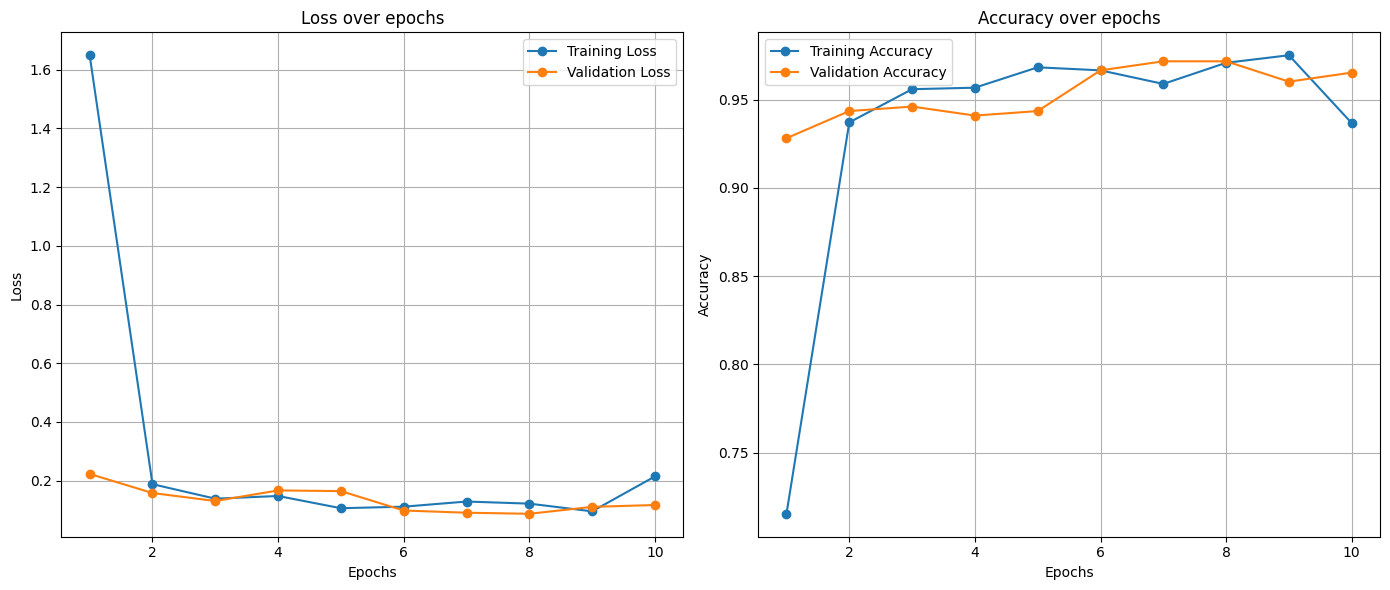

In [158]:
# Training the model and storing the training history
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Extracting the loss and accuracy values from the history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotting loss
axs[0].plot(epochs, loss, label='Training Loss', marker='o')
axs[0].plot(epochs, val_loss, label='Validation Loss', marker='o')
axs[0].set_title('Loss over epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Plotting accuracy
axs[1].plot(epochs, accuracy, label='Training Accuracy', marker='o')
axs[1].plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
axs[1].set_title('Accuracy over epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()